# Solving ODE using Euler Method

<p>
    The Euler method (also called forward Euler method) is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value.
</p>

Consider a differential equation of form :
$$f(t) = \frac{dy}{dt} = A*y(t) + B*u(t)$$

<p>
here,<br>
     A, B $\rightarrow$ Constant<br>
    u(t) $\rightarrow$ strictly function of 't'<br>
    y(t) $\rightarrow$ is what we are solving for<br>
</p>

We Know that,
    $$\frac{dy}{dt} = \frac{y(t_{k+1})-y(t_{k})}{(t_{k+1})-t_{k}}$$

### Discretizing time:

<p>
Assuming $y(t)$ is defined from $t_{0}$ to $t_{end}$,and let there be $n-1$ equally spaced points btw $t_{0}$ to $t_{end}$.
    
here, $t_{k}$ $\rightarrow$ $k^{th}$ point of time (i.e from $t_{0}$ to $t_{end}$)
    <br><br>
    $\Delta\:t = t_{k+1}-t_{k}$
    <br><br>
    $ time = [\:t_{0},\:(t_{0}+1 * \Delta\:t),\:(t_{0}+2 * \Delta\:t),\:(t_{0}+3 * \Delta\:t),\:...\:,\:(t_{0}+(n-1) * \Delta\:t),\:t_{end}]$
    <br><br>
    So, $time$ has $n+1$ points or elements.
    <br>
    <br>
    Note :
    <br>
    $$\Delta\:t = \frac{(t_{end} - t_{0})}{n}$$<br><br>
    $time[0] = t_{0}$<br>
    $time[n] = t_{end}$<br>
    $time[k] = t_0\:+\:k\:*\Delta\:t$<br>
    Such that, $k \in [0,1,2,3,...,n-1]$
</p>

### Forming Euler's Forward Method

$$\frac{dy}{dt} = \frac{y(t_{k+1})-y(t_{k})}{(t_{k+1})-t_{k}} = \frac{y_{k+1}-y_{k}}{\Delta\:t}$$<br>

From above,<br>
$$f(t) = \frac{dy}{dt}$$<br>

Which implies,<br>
$$\frac{y_{k+1}-y_{k}}{\Delta\:t} = f(t)$$<br>
$$y_{k+1}-y_{k} = {\Delta\:t} * f(t)$$<br>
$$y_{k+1}=y_{k} + {\Delta\:t} * f(t)$$<br>
Here, $f(t)$ is evaluated at $t_{k+1}$ using $y_k$ for $y(t)$. Hence, $f(t)$ is written as $f(t,y_k)$.<br>

$$y_{k+1}=y_{k} + {\Delta\:t} * f(t,y_k)$$<br>
<br>
Note:<br>
1. $y_k$ at k = 0 ($or\:y_0$) is the initial value of the given ODE .
2. for finding $y(t_1)$ or ($y_1$) , $y_k$ in above equation is taken as $y_0$ .
3. for finding $y(t_2)$ or ($y_2$) , $y_k$ in above equation is taken as $y_1$ and similarly for finding $y(t_{k+1})$ or ($y_{k+1}$) , $y_k$ in above equation is taken as $y_k$
4. for $y(t)$ inside $f(t)$ we again substitute with $y_k$ from previous iteration ( or $y_0$ for finding $y_1$ ).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Example

## RL Circuit:

![](RL_Series.jpg)

<br>

$$V(t) = L*\: \frac{di(t)}{dt}\:+\:R*i(t)$$<br>
$$\frac{di(t)}{dt}\: = -1*\frac{R}{L}\:i(t) + \:\frac{V(t)}{L}$$<br><br>
Assuming,
$$i(0) = 0$$<br><br>
<br>
<br>
Comparing to above standard ODE,<br>
$$f(t) = \frac{di(t)}{dt}$$<br>
$$u(t) = V(t)$$<br>
$$A = -\frac{R}{L}$$<br>
$$y(t) = i(t)$$

### Input V(t):
$$V(t) = 1* \mu(t\:-0.5m)$$<br>
where $\mu(t)$ is unit step function

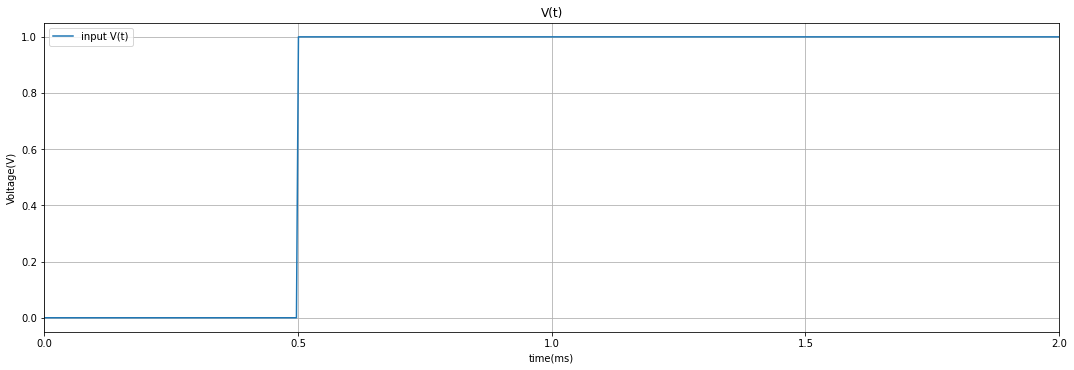

In [2]:
# Exact solution
tact = np.linspace(0,2e-3,512)
R=10
L=1e-3
b = 0.5e-3 #timeshift
v = np.heaviside(tact-b, 0.9)
iact = (1 - np.exp(-1*(tact-b)*(R/L)) )*(v/R)

# Plotting Input V(t)
plt.figure(figsize=(15,5))
plt.plot(tact*1000,v,label='input V(t)')
# plt.plot(tact*1000,iact,label='Current response i(t)')
plt.xlabel('time(ms)')
plt.ylabel('Voltage(V)')
plt.xlim(0,2e-3)
plt.xticks(np.linspace(0,2,5))
plt.legend()
plt.grid(1)
plt.tight_layout(pad=1)
plt.title('V(t)');

In [3]:
def f(t,i_0):
    R = 10
    L = 1e-3
    b = 0.5e-3
    u = np.heaviside(t-b, 0.9)
    didt = -1*(R/L)*i_0 + ( u/L ) 
    return didt

In [4]:
t0 = 0
tend = 2e-3
n = int(101)
delT = abs(tend - t0)/n
time = np.linspace(t0,tend,n+1)

In [5]:
ioft = np.array([])
i0 = 0
for t in time:
    inew = i0 + delT*f(t,i0)
    i0 = inew
    ioft = np.append(ioft,inew)

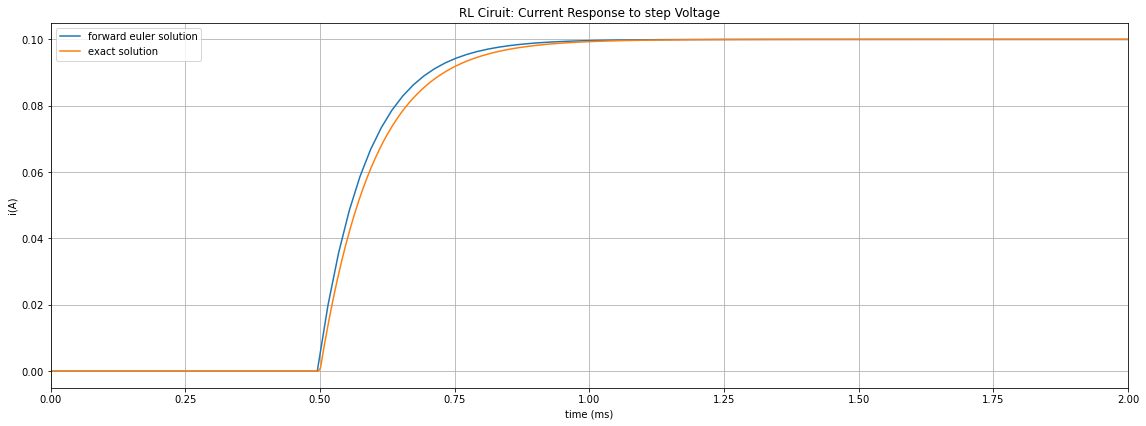

In [6]:
plt.figure(figsize=(16,6))
plt.title('RL Ciruit: Current Response to step Voltage')
# plt.plot(tact*1000,v,label = 'Input V(t)')
plt.plot(time*1000, ioft, label='forward euler solution')
plt.plot(tact*1000, iact, label='exact solution')
plt.xlim([0,2])
plt.xlabel('time (ms)')
plt.ylabel('i(A)')
plt.grid(1)
plt.xticks(np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]))
plt.legend(loc="upper left");
plt.tight_layout(pad=1)